In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [5]:
print(X.head())
print(y.value_counts())
print(X.info())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  
num
0      164
1       55
2       36
3       35
4       13
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  

In [7]:
print(X.isnull().sum())
# Example: fill NaNs with column mean
X = X.fillna(X.mean())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=8)
X_selected = selector.fit_transform(X_scaled, y.values.ravel())  # ensure y is 1D
selected_cols = X.columns[selector.get_support()]
print("Selected features:", selected_cols.tolist())


Selected features: ['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


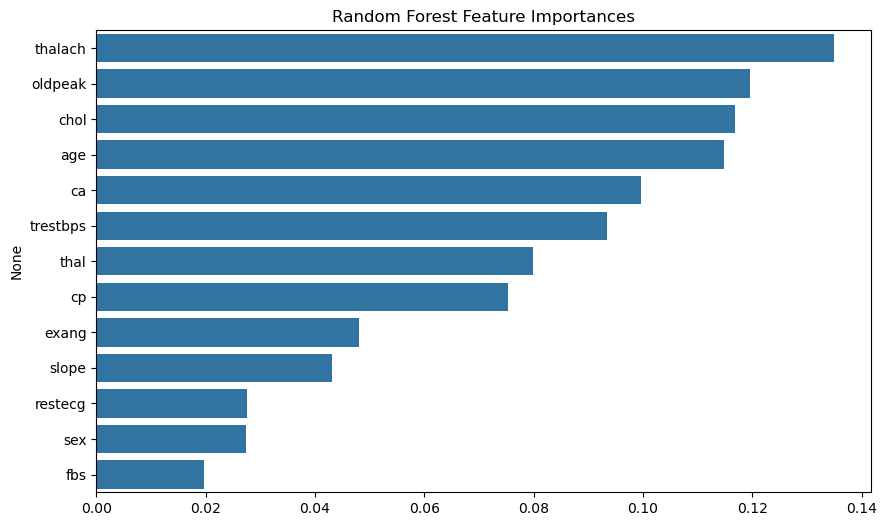

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y.values.ravel())
importances = rf.feature_importances_
indices = importances.argsort()[::-1]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Random Forest Feature Importances")
plt.show()


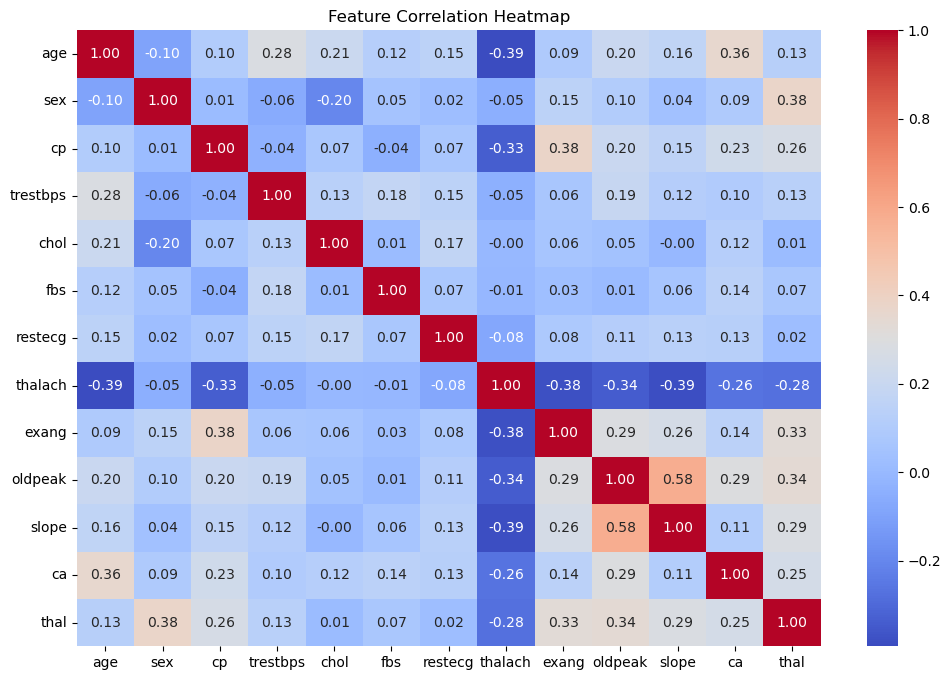

In [15]:
import pandas as pd

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
corr = X_scaled_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


D:\Anaconda\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being s

              precision    recall  f1-score   support

           0       0.72      0.97      0.82        29
           1       0.09      0.08      0.09        12
           2       0.17      0.11      0.13         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.49        61
   macro avg       0.20      0.23      0.21        61
weighted avg       0.38      0.49      0.43        61



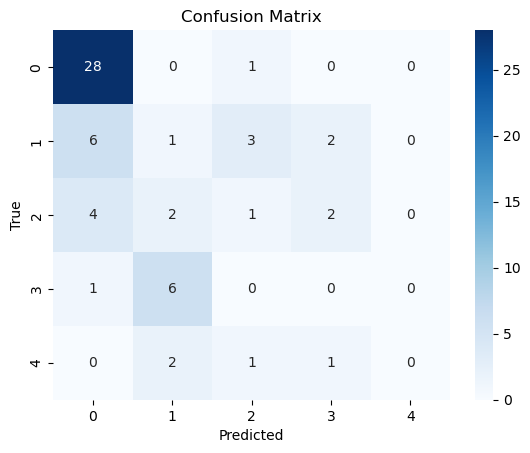

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X_scaled, y.values.ravel(), cv=5)
import numpy as np
import pandas as pd

cv_table = pd.DataFrame({'Fold': np.arange(1, 6), 'Accuracy': scores})
print(cv_table)



   Fold  Accuracy
0     1  0.622951
1     2  0.672131
2     3  0.573770
3     4  0.533333
4     5  0.583333


In [21]:
print(cv_table.to_latex(index=False))


\begin{tabular}{rr}
\toprule
Fold & Accuracy \\
\midrule
1 & 0.622951 \\
2 & 0.672131 \\
3 & 0.573770 \\
4 & 0.533333 \\
5 & 0.583333 \\
\bottomrule
\end{tabular}



In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')  # Clean white background
sns.set_context('talk')  # Larger font sizes, great for papers
sns.set_palette('deep')  # Good-looking color palette



C:\Users\Amogh\AppData\Local\Temp\ipykernel_7316\3594121260.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices],


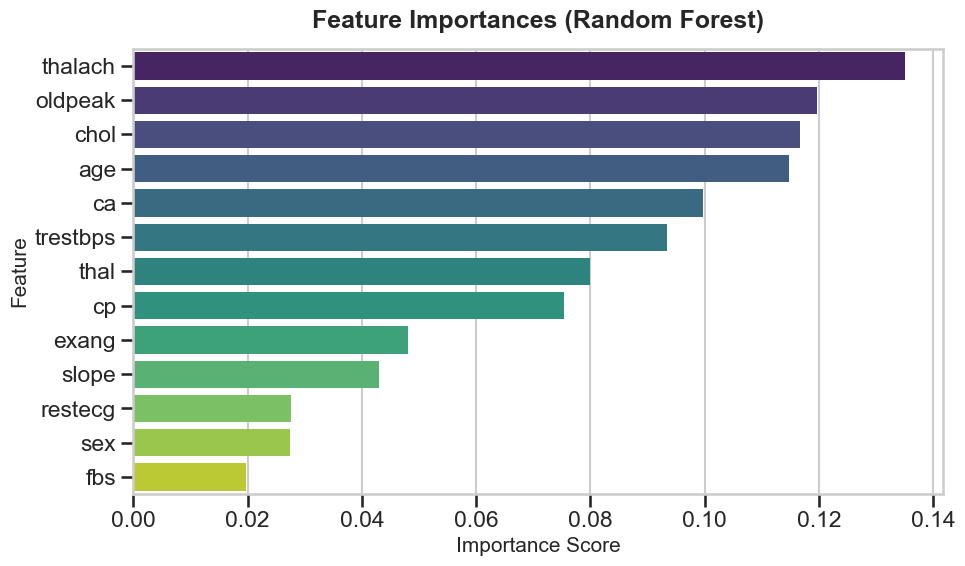

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y.values.ravel())
importances = rf.feature_importances_
indices = importances.argsort()[::-1]

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=importances[indices],
            y=X.columns[indices],
            ax=ax,
            orient='h',
            palette='viridis')
ax.set_title("Feature Importances (Random Forest)", fontsize=18, fontweight='bold', pad=15)
ax.set_xlabel("Importance Score", fontsize=15)
ax.set_ylabel("Feature", fontsize=15)
plt.tight_layout()
plt.show()


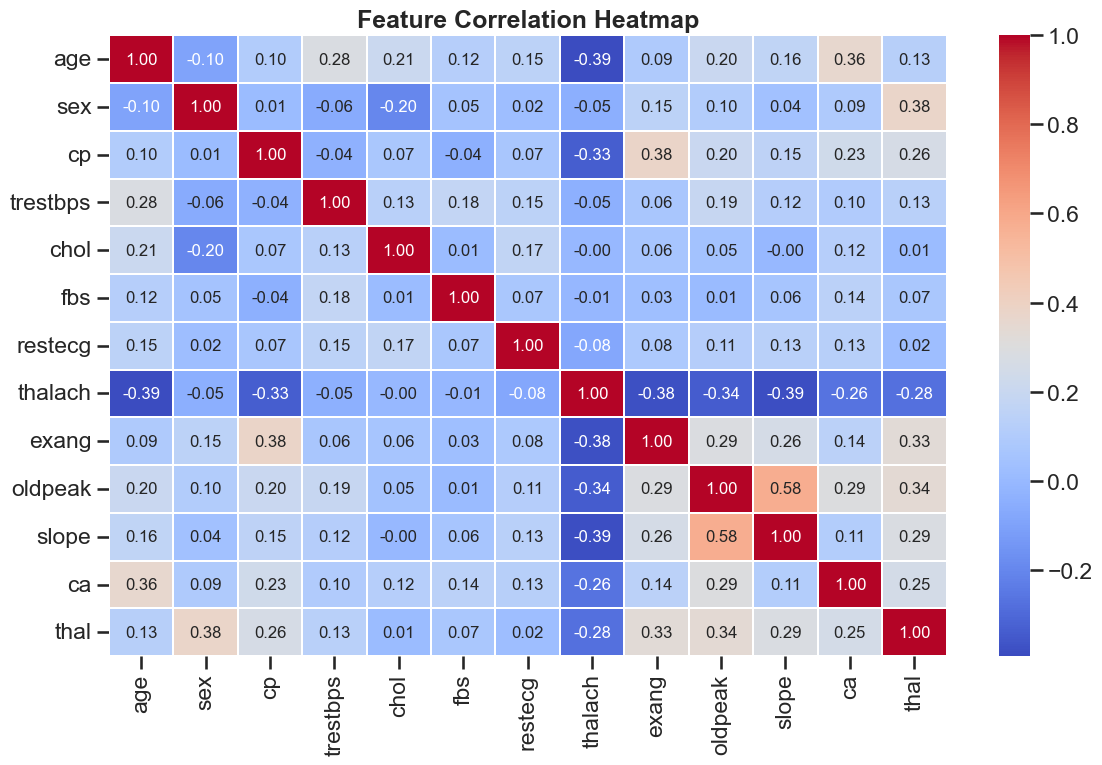

In [27]:
corr = pd.DataFrame(X_scaled, columns=X.columns).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.2, annot_kws={"size":12})
plt.title("Feature Correlation Heatmap", fontsize=18, fontweight='bold')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


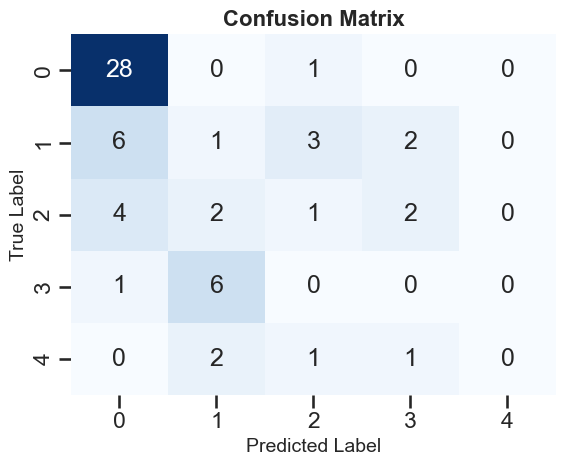

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax, annot_kws={"size":18})
ax.set_xlabel('Predicted Label', fontsize=14)
ax.set_ylabel('True Label', fontsize=14)
ax.set_title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [31]:
scores = cross_val_score(rf, X_scaled, y.values.ravel(), cv=5)
cv_table = pd.DataFrame({'Fold': np.arange(1, 6), 'Accuracy': scores})
print(cv_table.to_markdown(index=False))  # For Markdown in papers
print(cv_table.to_latex(index=False))     # For LaTeX for academic papers


|   Fold |   Accuracy |
|-------:|-----------:|
|      1 |   0.622951 |
|      2 |   0.672131 |
|      3 |   0.57377  |
|      4 |   0.533333 |
|      5 |   0.583333 |
\begin{tabular}{rr}
\toprule
Fold & Accuracy \\
\midrule
1 & 0.622951 \\
2 & 0.672131 \\
3 & 0.573770 \\
4 & 0.533333 \\
5 & 0.583333 \\
\bottomrule
\end{tabular}



In [33]:
from tabulate import tabulate
print(tabulate(cv_table, headers='keys', tablefmt='github', showindex=False))


|   Fold |   Accuracy |
|--------|------------|
|      1 |   0.622951 |
|      2 |   0.672131 |
|      3 |   0.57377  |
|      4 |   0.533333 |
|      5 |   0.583333 |


In [35]:
plt.savefig('figure1.png', dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [37]:
import pandas as pd
corr = X.corr()
print(corr.to_markdown())


|          |        age |        sex |         cp |   trestbps |        chol |         fbs |    restecg |     thalach |      exang |     oldpeak |       slope |         ca |       thal |
|:---------|-----------:|-----------:|-----------:|-----------:|------------:|------------:|-----------:|------------:|-----------:|------------:|------------:|-----------:|-----------:|
| age      |  1         | -0.0975423 |  0.104139  |  0.284946  |  0.20895    |  0.11853    |  0.148868  | -0.393806   |  0.0916608 |  0.203805   |  0.16177    |  0.359489  |  0.127368  |
| sex      | -0.0975423 |  1         |  0.0100839 | -0.0644559 | -0.199915   |  0.0478621  |  0.0216474 | -0.0486633  |  0.146201  |  0.102173   |  0.0375329  |  0.0928908 |  0.3793    |
| cp       |  0.104139  |  0.0100839 |  1         | -0.0360772 |  0.0723189  | -0.039975   |  0.0675052 | -0.334422   |  0.38406   |  0.202277   |  0.15205    |  0.232332  |  0.264895  |
| trestbps |  0.284946  | -0.0644559 | -0.0360772 |  1         | 

In [39]:
importances = rf.feature_importances_
feat_table = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feat_table.sort_values(by='Importance', ascending=False).to_markdown(index=False))


| Feature   |   Importance |
|:----------|-------------:|
| thalach   |    0.135002  |
| oldpeak   |    0.119577  |
| chol      |    0.116745  |
| age       |    0.114771  |
| ca        |    0.099649  |
| trestbps  |    0.0933898 |
| thal      |    0.0798618 |
| cp        |    0.0753443 |
| exang     |    0.0480119 |
| slope     |    0.0430581 |
| restecg   |    0.0275431 |
| sex       |    0.0273615 |
| fbs       |    0.0196857 |


In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
print(pd.DataFrame(cm).to_markdown())


NameError: name 'y_true' is not defined

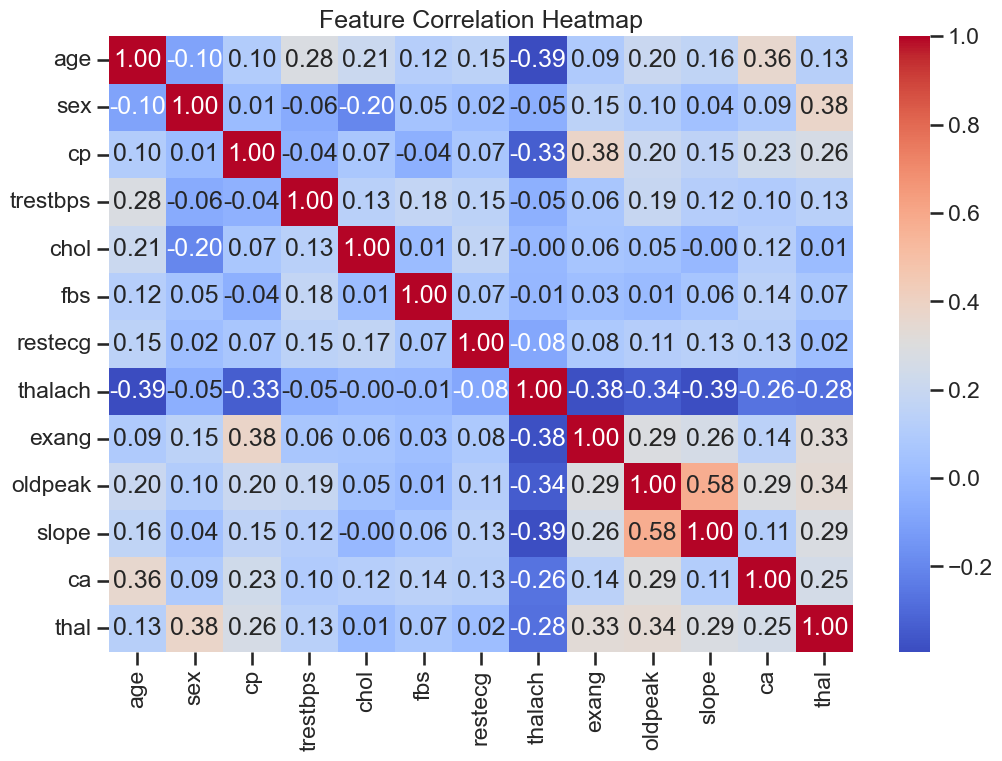

| Feature   |   InfoGain |
|:----------|-----------:|
| thal      |  0.180248  |
| cp        |  0.156115  |
| oldpeak   |  0.148612  |
| ca        |  0.125358  |
| sex       |  0.115692  |
| thalach   |  0.102789  |
| slope     |  0.0993229 |
| exang     |  0.0980517 |
| restecg   |  0.0810417 |
| chol      |  0.0201726 |
| age       |  0         |
| trestbps  |  0         |
| fbs       |  0         |


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Assuming X and y are already loaded, as from ucimlrepo
# Correlation heatmap
corr = X.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Information Gain (Mutual Information)
le = LabelEncoder()
mi = mutual_info_classif(X, le.fit_transform(y.values.ravel()))
mi_table = pd.DataFrame({'Feature': X.columns, 'InfoGain': mi})
print(mi_table.sort_values(by='InfoGain', ascending=False).to_markdown(index=False))


In [55]:
from sklearn.model_selection import train_test_split, cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
rf = RandomForestClassifier(random_state=42)
sfs = SFS(rf, 
          k_features=5, 
          forward=True, 
          floating=False, 
          scoring='accuracy', 
          cv=5)
sfs = sfs.fit(X_train, y_train.values.ravel())

print("Selected features:", sfs.k_feature_names_)
selected_feats = list(sfs.k_feature_names_)

# Accuracy comparison
rf.fit(X_train, y_train)
all_score = rf.score(X_test, y_test)
rf.fit(X_train[selected_feats], y_train)
sfs_score = rf.score(X_test[selected_feats], y_test)

print(f"Random Forest (All features) accuracy: {all_score:.2f}")
print(f"Wrapper SFS (Selected) accuracy: {sfs_score:.2f}")


Selected features: ('sex', 'cp', 'restecg', 'slope', 'ca')


D:\Anaconda\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\Anaconda\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest (All features) accuracy: 0.55
Wrapper SFS (Selected) accuracy: 0.46


In [47]:
!pip install mlxtend


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 330.3 kB/s eta 0:00:05
   - -------------------------------------- 0.0/1.4 MB 217.9 kB/s eta 0:00:07
   -- ------------------------------------- 0.1/1.4 MB 328.6 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.4 MB 467.6 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 423.5 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 423.5 kB/s eta 0:00:03
   ---- ----------------------------------- 0.1/1.4 MB 370.8 kB/s eta 0:00:04
   ----- ---------------------------------- 0.2/1.4 MB 419.0 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.4 MB 419.0 kB/s eta 0:00:03
   ------ ------------

In [54]:
from sklearn.model_selection import train_test_split, cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
rf = RandomForestClassifier(random_state=42)
sfs = SFS(rf, 
          k_features=5, 
          forward=True, 
          floating=False, 
          scoring='accuracy', 
          cv=5)
sfs = sfs.fit(X_train, y_train.values.ravel())

print("Selected features:", sfs.k_feature_names_)
selected_feats = list(sfs.k_feature_names_)

# Accuracy comparison
rf.fit(X_train, y_train)
all_score = rf.score(X_test, y_test)
rf.fit(X_train[selected_feats], y_train)
sfs_score = rf.score(X_test[selected_feats], y_test)

print(f"Random Forest (All features) accuracy: {all_score:.2f}")
print(f"Wrapper SFS (Selected) accuracy: {sfs_score:.2f}")


Selected features: ('sex', 'cp', 'restecg', 'slope', 'ca')


D:\Anaconda\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
D:\Anaconda\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest (All features) accuracy: 0.55
Wrapper SFS (Selected) accuracy: 0.46


In [53]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l1', solver='liblinear')
clf.fit(X_train, y_train.values.ravel())
lasso_coeff = pd.Series(clf.coef_[0], index=X.columns)
selected_lasso = lasso_coeff[lasso_coeff != 0].index.tolist()

print("Lasso selected features:", selected_lasso)


Lasso selected features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [52]:
# Filter: Top 8 by info gain
top_filter_feats = mi_table.sort_values(by='InfoGain', ascending=False)['Feature'][:8]
# Embedded: Lasso selected
top_embedded_feats = selected_lasso
combined_feats = list(set(top_filter_feats).union(set(top_embedded_feats)))

rf.fit(X_train[combined_feats], y_train)
hybrid_score = rf.score(X_test[combined_feats], y_test)
print(f"Hybrid method accuracy: {hybrid_score:.2f}")


D:\Anaconda\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Hybrid method accuracy: 0.55


In [56]:
import pandas as pd

corr = X.corr()  # If X is your DataFrame of features
corr_table = corr.round(2)
print(corr_table.to_markdown())


|          |   age |   sex |    cp |   trestbps |   chol |   fbs |   restecg |   thalach |   exang |   oldpeak |   slope |    ca |   thal |
|:---------|------:|------:|------:|-----------:|-------:|------:|----------:|----------:|--------:|----------:|--------:|------:|-------:|
| age      |  1    | -0.1  |  0.1  |       0.28 |   0.21 |  0.12 |      0.15 |     -0.39 |    0.09 |      0.2  |    0.16 |  0.36 |   0.13 |
| sex      | -0.1  |  1    |  0.01 |      -0.06 |  -0.2  |  0.05 |      0.02 |     -0.05 |    0.15 |      0.1  |    0.04 |  0.09 |   0.38 |
| cp       |  0.1  |  0.01 |  1    |      -0.04 |   0.07 | -0.04 |      0.07 |     -0.33 |    0.38 |      0.2  |    0.15 |  0.23 |   0.26 |
| trestbps |  0.28 | -0.06 | -0.04 |       1    |   0.13 |  0.18 |      0.15 |     -0.05 |    0.06 |      0.19 |    0.12 |  0.1  |   0.13 |
| chol     |  0.21 | -0.2  |  0.07 |       0.13 |   1    |  0.01 |      0.17 |     -0    |    0.06 |      0.05 |   -0    |  0.12 |   0.01 |
| fbs      |  0.12 |

In [57]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
mi = mutual_info_classif(X, le.fit_transform(y.values.ravel()))

info_gain_df = pd.DataFrame({'Feature': X.columns, 'Information_Gain': mi})
info_gain_df = info_gain_df.sort_values(by='Information_Gain', ascending=False).reset_index(drop=True)
print(info_gain_df.to_markdown(index=False))


| Feature   |   Information_Gain |
|:----------|-------------------:|
| cp        |        0.208986    |
| thal      |        0.200606    |
| oldpeak   |        0.16029     |
| ca        |        0.123224    |
| thalach   |        0.0823733   |
| slope     |        0.0792714   |
| exang     |        0.0701065   |
| sex       |        0.0300452   |
| chol      |        0.0270435   |
| age       |        9.35016e-05 |
| trestbps  |        0           |
| fbs       |        0           |
| restecg   |        0           |


In [60]:
print(info_gain_df.to_latex(index=False))


\begin{tabular}{lr}
\toprule
Feature & Information_Gain \\
\midrule
cp & 0.208986 \\
thal & 0.200606 \\
oldpeak & 0.160290 \\
ca & 0.123224 \\
thalach & 0.082373 \\
slope & 0.079271 \\
exang & 0.070106 \\
sex & 0.030045 \\
chol & 0.027044 \\
age & 0.000094 \\
trestbps & 0.000000 \\
fbs & 0.000000 \\
restecg & 0.000000 \\
\bottomrule
\end{tabular}



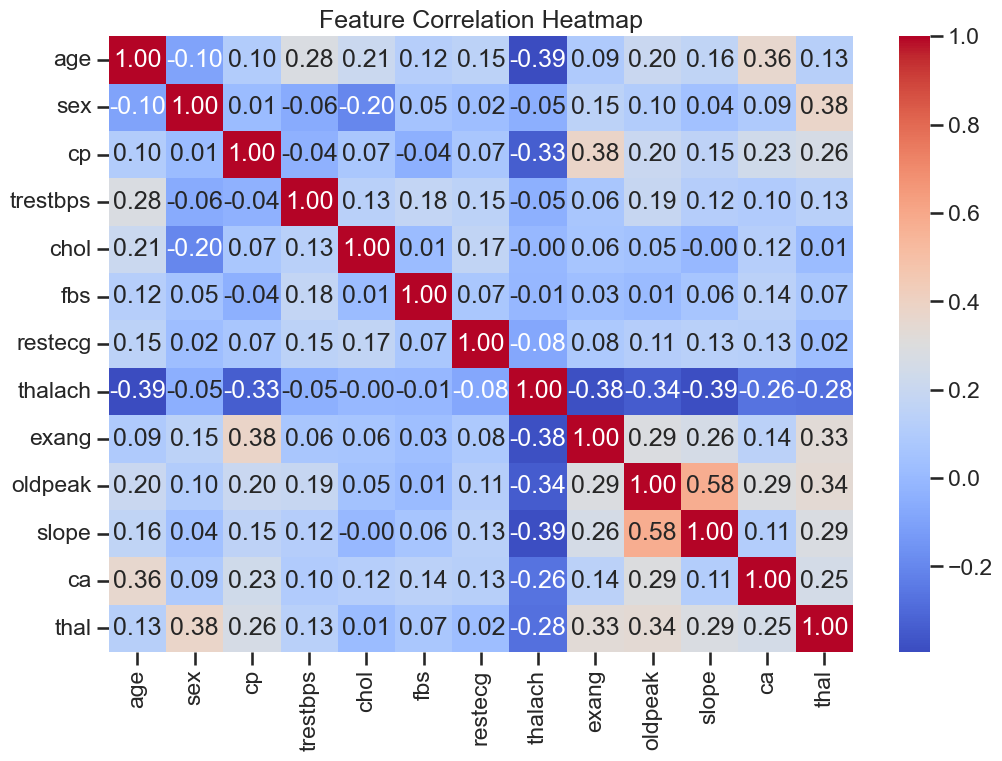

| Feature   |   InfoGain |
|:----------|-----------:|
| ca        |  0.181775  |
| thal      |  0.174957  |
| cp        |  0.133751  |
| slope     |  0.106541  |
| oldpeak   |  0.104855  |
| thalach   |  0.0845584 |
| exang     |  0.0721946 |
| sex       |  0.0535061 |
| chol      |  0.0344281 |
| fbs       |  0.0222411 |
| restecg   |  0.0123614 |
| age       |  0         |
| trestbps  |  0         |


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Assuming X and y are already loaded, as from ucimlrepo
# Correlation heatmap
corr = X.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Information Gain (Mutual Information)
le = LabelEncoder()
mi = mutual_info_classif(X, le.fit_transform(y.values.ravel()))
mi_table = pd.DataFrame({'Feature': X.columns, 'InfoGain': mi})
print(mi_table.sort_values(by='InfoGain', ascending=False).to_markdown(index=False))
